# Judd Creek Project

In [1]:
# This first cell just loads a few modules that we'll need.
# Run it by clicking on any of the text, holding down the shift key, and then pressing enter.
import os
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from judd import *

In [2]:
# 1. First, let's open on of the downloaded data files from this site:
# https://green2.kingcounty.gov/hydrology/DataDownload.aspx

# 2. To select the right station, you'll need to use the map:
# https://green2.kingcounty.gov/hydrology/GaugeMap.aspx

# 3. Upload the data file you downloaded to the Jupyter Hub, in the data directory, and then change the
# following path to the name of the file.
filepath = 'streamflow-daily/Hydrology_NQWIB.csv'

# The King county files are not well formatted so we have to have a few extra lines here to clean
# the data
with open(filepath) as f:
    lines = [line.rstrip(',\n') for line in f]

# Write cleaned lines to a temporary in-memory string
cleaned_data = StringIO('\n'.join(lines))

# Now read with pandas
df = pd.read_csv(cleaned_data)

df

,Site_Code,Collect Date (local),Stage (ft),Discharge (cfs),E = Estimate; W = Warning; P = Provisional
0,28a,7/16/1999,NaN,3.66,NaN
1,28a,7/17/1999,NaN,5.53,NaN
2,28a,7/18/1999,NaN,3.20,NaN
3,28a,7/19/1999,NaN,2.69,NaN
4,28a,7/20/1999,NaN,2.53,NaN
...,...,...,...,...,...
9391,28a,4/1/2025,1.28,4.21,P
9392,28a,4/2/2025,1.26,3.89,P
9393,28a,4/3/2025,1.25,3.59,P
9394,28a,4/4/2025,1.23,3.25,P


In [3]:
# Download all of the data files from the the study area.
# Unfortunately, the provided files are not well formatted.
# The following code is necessary to correct the downloaded files. 
# The code also puts all of the data into one big output file.

data_dir = "data/"
df = king_county_csv_loader(data_dir)
df

Hydrology_PUQEW.csv
✔ Loaded Hydrology_PUQEW.csv (231 rows)
Hydrology_PZIRJ.csv
✔ Loaded Hydrology_PZIRJ.csv (246 rows)
Hydrology_ZIEDQ.csv
✔ Loaded Hydrology_ZIEDQ.csv (246 rows)
Hydrology_JAINW.csv
✔ Loaded Hydrology_JAINW.csv (8 rows)
Hydrology_ACGAA.csv
✔ Loaded Hydrology_ACGAA.csv (247 rows)
Hydrology_GCMUR.csv
✔ Loaded Hydrology_GCMUR.csv (319 rows)


,Site_Code,Collect Date (local),Precipitation (inches),Flag1,Flag2,Flag3
0,36V,2005-03-01,2.78,,,
1,36V,2005-04-01,3.96,,,
2,36V,2005-05-01,2.71,,,
3,36V,2005-06-01,1.26,,,
4,36V,2005-07-01,1.11,,,
...,...,...,...,...,...,...
1292,43U,2024-12-01,8.65,P,,
1293,43U,2025-01-01,2.59,P,,
1294,43U,2025-02-01,4.95,P,,
1295,43U,2025-03-01,6.13,P,,


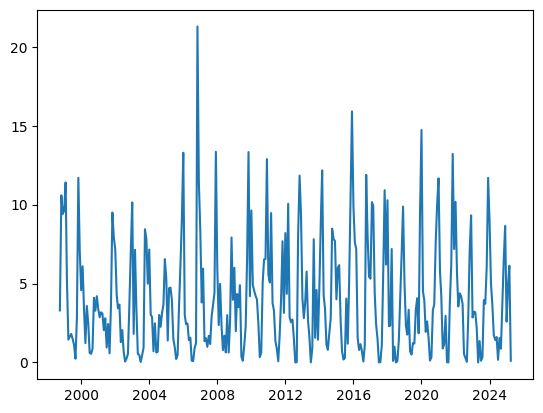

Average precipitation: 4.042382445141066
Average annual precipitation: 48.5085893416928


In [4]:
# Here's a simple bit of code to plot the time series
# from a single station

# Filter data
df_filtered = df[df.Site_Code == '43U']

# Plot
plt.plot(df_filtered['Collect Date (local)'], 
         df_filtered['Precipitation (inches)'])

plt.show()

print(f'Average precipitation: {df_filtered["Precipitation (inches)"].mean()}')
print(f'Average annual precipitation: {df_filtered["Precipitation (inches)"].mean() * 12}')

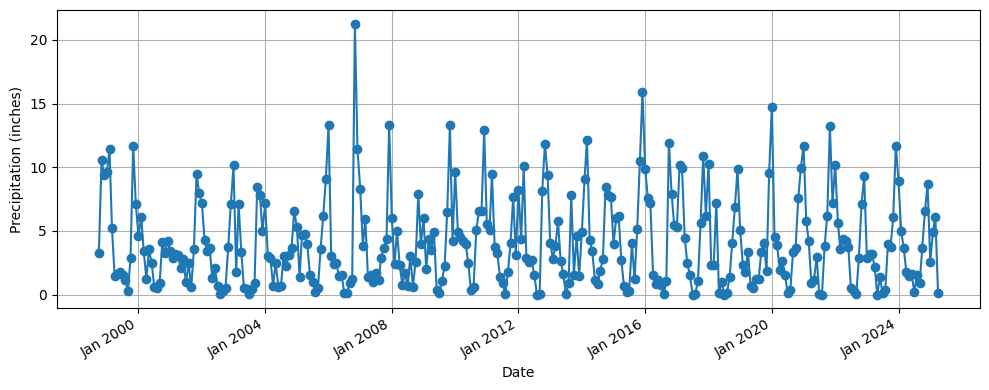

In [5]:
# This code makes a more nicely formatted plot.

fig, ax = plt.subplots(figsize=(10, 4))

# Filter data
df_filtered = df[df.Site_Code == '43U']

# Plot
ax.plot(df_filtered['Collect Date (local)'], 
        df_filtered['Precipitation (inches)'],
        marker='o', linestyle='-')

# Labels
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (inches)")
ax.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
formatter = mdates.DateFormatter("%b %Y")  # e.g., 'Apr 2025'
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [6]:
# Assuming your DataFrame is called df
df['Collect Date (local)'] = pd.to_datetime(df['Collect Date (local)'])

# Define the hydrological year: assign the year of the following January to dates from Oct–Dec
df['Hydro Year'] = df['Collect Date (local)'].apply(
    lambda x: x.year + 1 if x.month >= 10 else x.year
)

# Group by Hydro Year and Site_Code and calculate average precipitation
avg_precip = df.groupby(['Site_Code', 'Hydro Year'])['Precipitation (inches)'].mean().reset_index()

# Rename for clarity
avg_precip.rename(columns={'Precipitation (inches)': 'Avg Precip (inches)'}, inplace=True)

# Display the new DataFrame
print(avg_precip)


    Site_Code  Hydro Year  Avg Precip (inches)
0         28Y        2005             3.284167
1         28Y        2006             3.898333
2         28Y        2007             4.504167
3         28Y        2008             3.226667
4         28Y        2009             3.081667
..        ...         ...                  ...
108       65U        2023             3.144167
109       65U        2024             3.705000
110       65U        2025             3.991429
111       65v        2024             0.290000
112       65v        2025             4.592857

[113 rows x 3 columns]


In [7]:
# Now examine just one extreme year
avg_precip[avg_precip['Hydro Year']==2019]

,Site_Code,Hydro Year,Avg Precip (inches)
14,28Y,2019,3.055833
35,36U,2019,2.814167
56,36V,2019,2.705000
83,43U,2019,3.354167
104,65U,2019,3.201667


# Part 2: Theissen polygon ("Vornoi Diagram") maps

In [8]:
# In this section, we plot the above data spatially.  We'll start by looking at 
# the 2019 hydrological year.

import geopandas as gpd
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.colors as mcolors

# Step 1: Load metadata and filter avg_precip
metadata = pd.read_csv('data/metadata.csv', comment='#')

# Filter avg_precip to hydrological year 2019
avg_2019 = avg_precip[avg_precip['Hydro Year'] == 2019]

# Merge on site code
merged_2019 = avg_2019.merge(metadata, left_on='Site_Code', right_on='Site_Code')

merged_2019


,Site_Code,Hydro Year,Avg Precip (inches),x,y,lat,lon
0,28Y,2019,3.055833,1228139,163864,47.43699,-122.49933
1,36U,2019,2.814167,1243896,149883,47.39959,-122.43448
2,36V,2019,2.705000,1258256,144741,47.38630,-122.37609
3,43U,2019,3.354167,1235821,182204,47.48771,-122.46985
4,65U,2019,3.201667,1224469,132575,47.35100,-122.51140


In [9]:
# Next step: make an outline for the area of interest (AOI)
# do this by going to geojson.io, tracing out Vashon Island, and 
# then exporting the .geojson file and uploading it here.

geojson_path="data/map.geojson"
island_polygon = gpd.read_file(geojson_path).to_crs('EPSG:2926')
boundary_poly = island_polygon.unary_union


/tmp/ipykernel_2319239/1101048457.py:7: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  boundary_poly = island_polygon.unary_union


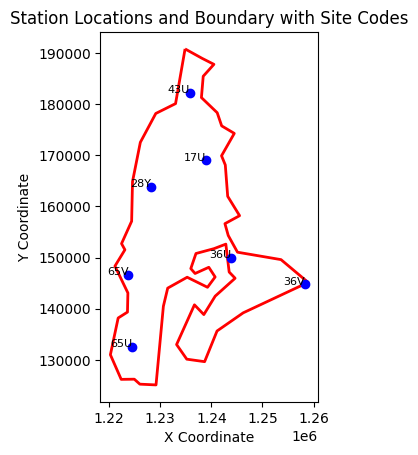

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Create a GeoDataFrame for station locations
station_gdf = gpd.GeoDataFrame(
    metadata,
    geometry=gpd.points_from_xy(metadata['lon'], metadata['lat']),
    crs='EPSG:4326'  # Assuming the coordinates are in WGS84
).to_crs('EPSG:2926')  # Convert to the same CRS as boundary_poly

# Plot the boundary polygon and station locations
fig, ax = plt.subplots() #figsize=(10, 10)

# Plot the boundary polygon
gpd.GeoSeries(boundary_poly).plot(ax=ax, color='none', edgecolor='red', linewidth=2, label='Boundary')

# Plot the station locations
station_gdf.plot(ax=ax, color='blue', marker='o', label='Stations')

# Add station names to the map
for x, y, label in zip(station_gdf.geometry.x, station_gdf.geometry.y, station_gdf['Site_Code']):
    ax.text(x, y, label, fontsize=8, ha='right', color='black')

# Add labels and title
ax.set_title("Station Locations and Boundary with Site Codes")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
# plt.legend()
plt.show()

In [11]:
gdf_voronoi = make_voronoi_gdf(merged_2019, geojson_path=geojson_path)
gdf_voronoi

,Site_Code,Avg Precip (inches),geometry,Area (m²),Area (km²)
0,28Y,3.055833,"POLYGON ((1228147.092 148003.317, 1221424.392 ...",3.235064e+08,323.506442
1,36U,2.814167,"POLYGON ((1242992.538 164734.573, 1243202.291 ...",2.572383e+08,257.238272
2,36V,2.705000,"POLYGON ((1251995.216 149879.084, 1253636.32 1...",4.437535e+07,44.375345
3,43U,3.354167,"POLYGON ((1227399.323 174952.689, 1229135.064 ...",1.612146e+08,161.214629
4,65U,3.201667,"MULTIPOLYGON (((1240507.947 134129.136, 123868...",2.258528e+08,225.852810


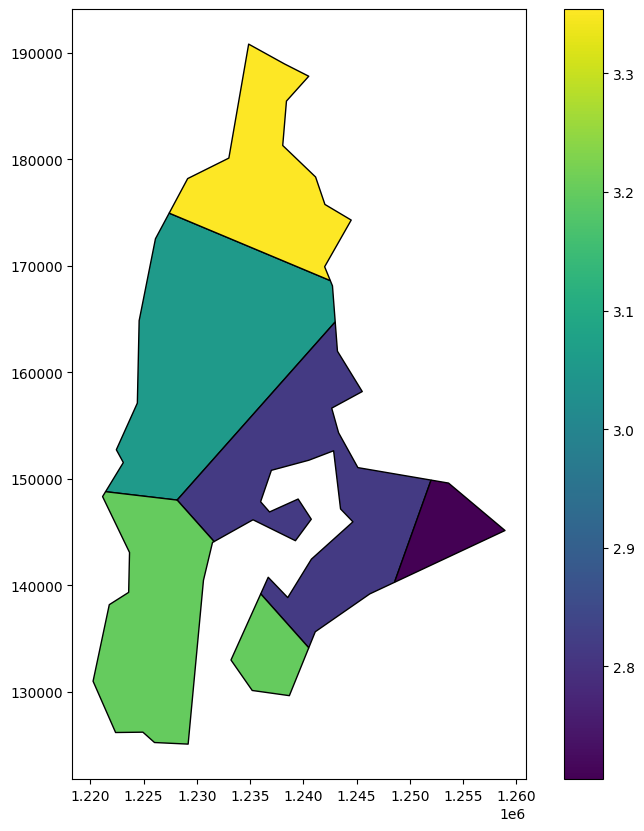

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_voronoi.plot(column='Avg Precip (inches)', cmap='viridis', edgecolor='k', legend=True,ax=ax)
plt.show()

In [13]:
# Import necessary libraries
import numpy as np

# Define the hydro years to process
hydro_years = [2017, 2018, 2019]

print('--------------------------------------------')
print('Annual Precip values for the entire island:')
print('--------------------------------------------')

# Loop through each hydro year
for year in hydro_years:
    # Filter avg_precip to the current hydrological year
    avg_year = avg_precip[avg_precip['Hydro Year'] == year]
    
    # Merge with metadata on site code
    merged_year = avg_year.merge(metadata, left_on='Site_Code', right_on='Site_Code')
    
    # Generate Voronoi diagram GeoDataFrame
    gdf_voronoi = make_voronoi_gdf(merged_year, geojson_path=geojson_path)
    
    # Calculate the annual average precipitation
    monthly_average = np.sum(gdf_voronoi['Avg Precip (inches)'] * gdf_voronoi['Area (km²)']) / np.sum(gdf_voronoi['Area (km²)'])
    annual_average = 12*monthly_average
    
    # Print the result for the current year
    print(f'Monthly average precipitation for {year}: {monthly_average:.2f} inches')
    print(f'Annual average precipitation for {year}: {annual_average:.2f} inches\n')

--------------------------------------------
Annual Precip values for the entire island:
--------------------------------------------
Monthly average precipitation for 2017: 4.76 inches
Annual average precipitation for 2017: 57.08 inches

Monthly average precipitation for 2018: 3.57 inches
Annual average precipitation for 2018: 42.86 inches

Monthly average precipitation for 2019: 3.06 inches
Annual average precipitation for 2019: 36.71 inches



In [18]:
import pandas as pd
import numpy as np

# Define range of fractions and hydro years
fraction_values = [0.25, 0.5, 0.75]
hydro_years = np.arange(2000, 2025, 1)
output_data = []

for frac in fraction_values:
    Fraction_28Y = frac
    Fraction_36U = 1 - frac
    
    for year in hydro_years:
        try:
            # Filter for the current year
            avg_year = avg_precip[avg_precip['Hydro Year'] == year]
            if avg_year.empty:
                raise ValueError(f"No avg_precip data for Hydro Year {year}")
            
            merged_year = avg_year.merge(metadata, left_on='Site_Code', right_on='Site_Code')
            if merged_year.empty:
                raise ValueError(f"No matching metadata for Hydro Year {year}")
            
            # Generate Voronoi GeoDataFrame
            gdf_voronoi = make_voronoi_gdf(merged_year, geojson_path=geojson_path)
            if gdf_voronoi.empty:
                raise ValueError(f"Empty Voronoi GeoDataFrame for Hydro Year {year}")
            
            # Extract precipitation values
            precip_28Y = gdf_voronoi.loc[gdf_voronoi['Site_Code'] == '28Y', 'Avg Precip (inches)'].values
            precip_36U = gdf_voronoi.loc[gdf_voronoi['Site_Code'] == '36U', 'Avg Precip (inches)'].values
            
            if precip_28Y.size == 0 or precip_36U.size == 0:
                raise ValueError(f"Missing precipitation data for 28Y or 36U in Hydro Year {year}")
            
            # Compute weighted annual precip
            monthly_average = precip_28Y[0] * Fraction_28Y + precip_36U[0] * Fraction_36U
            annual_precip = 12 * monthly_average
            
            # Save the result
            output_data.append({
                'Hydro Year': year,
                'Fraction_28Y': Fraction_28Y,
                'Annual Precip (inches)': annual_precip
            })
        
        except Exception as e:
            print(f"Skipping year {year} with Fraction_28Y = {Fraction_28Y}")
            continue

# Write results to CSV
df_output = pd.DataFrame(output_data)
df_output.to_csv('judd_creek_annual_precip_sensitivity.csv', index=False)

print("CSV file 'judd_creek_annual_precip_sensitivity.csv' created successfully.")


Skipping year 2000 with Fraction_28Y = 0.25
Skipping year 2001 with Fraction_28Y = 0.25
Skipping year 2002 with Fraction_28Y = 0.25
Skipping year 2003 with Fraction_28Y = 0.25
Skipping year 2004 with Fraction_28Y = 0.25
Skipping year 2000 with Fraction_28Y = 0.5
Skipping year 2001 with Fraction_28Y = 0.5
Skipping year 2002 with Fraction_28Y = 0.5
Skipping year 2003 with Fraction_28Y = 0.5
Skipping year 2004 with Fraction_28Y = 0.5
Skipping year 2000 with Fraction_28Y = 0.75
Skipping year 2001 with Fraction_28Y = 0.75
Skipping year 2002 with Fraction_28Y = 0.75
Skipping year 2003 with Fraction_28Y = 0.75
Skipping year 2004 with Fraction_28Y = 0.75
CSV file 'judd_creek_annual_precip_sensitivity.csv' created successfully.
